In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE  # For bonus task

In [30]:
# Load the dataset
loan_data = pd.read_csv('loan_approval_dataset.csv')

loan_data


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [32]:
loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [33]:
# Check missing values
loan_data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [34]:
# Target distribution
print(loan_data['loan_status'].value_counts(normalize=True))

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64


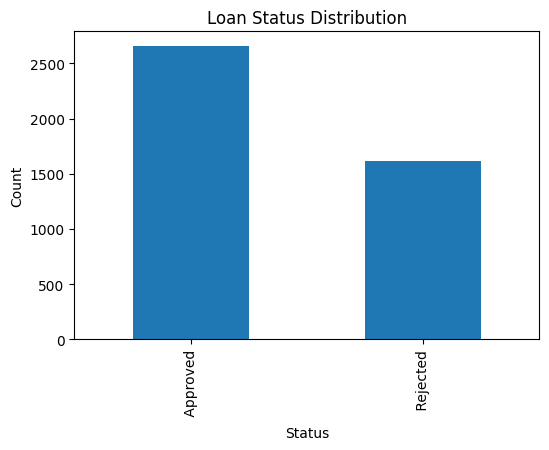

In [35]:
# Visualize class imbalance
plt.figure(figsize=(6, 4))
loan_data['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

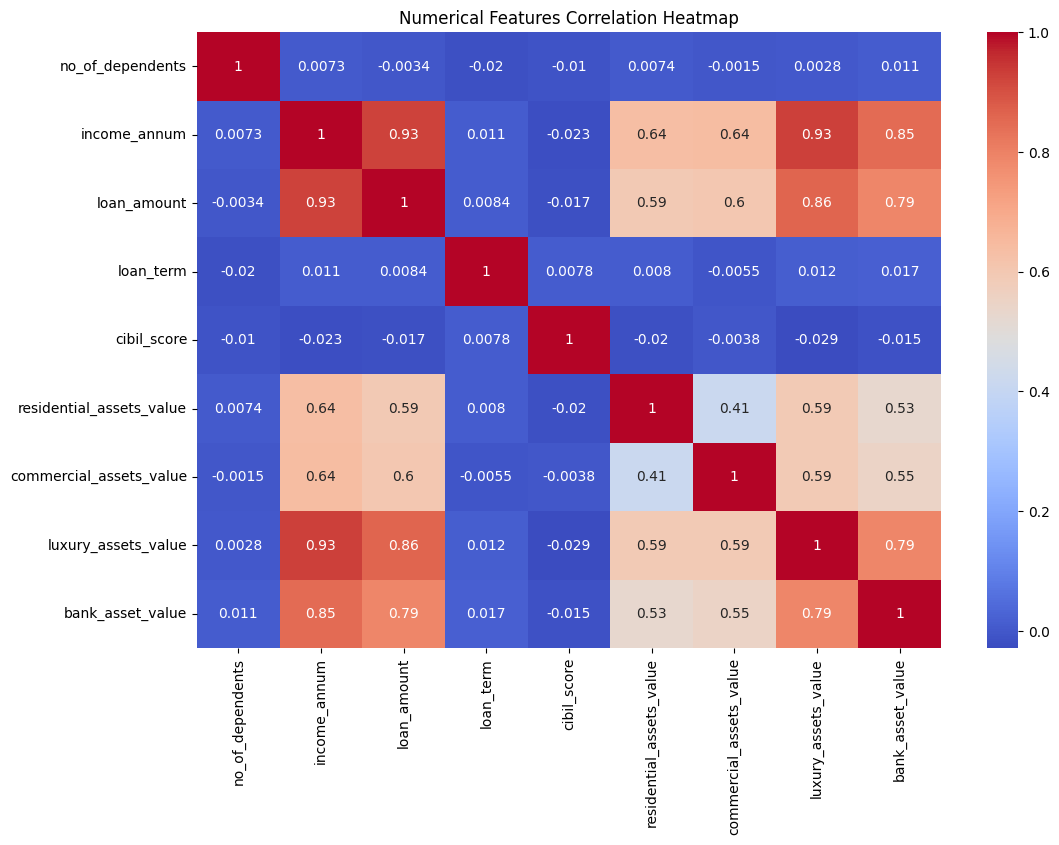

In [36]:
# Correlation heatmap (for numerical features)
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(12, 8))
sns.heatmap(loan_data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Features Correlation Heatmap')
plt.show()

In [37]:
loan_data = loan_data.drop('loan_id', axis = 1)

loan_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [38]:
# Separating features and target variable
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

# Encoding target (Approved: 1, Rejected: 0)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [46]:
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

categorical_columns = ['education', 'self_employed']

# Handling missing values
num_imputer = SimpleImputer(strategy='median')
X[numerical_columns] = num_imputer.fit_transform(X[numerical_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = cat_imputer.fit_transform(X[categorical_columns])

# Encoding categorical variables
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Scaling numerical features (For Logistic Regression)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print("Post-preprocessing shape:", X.shape)
print("Missing values after preprocessing:\n", X.isnull().sum())


Post-preprocessing shape: (4269, 11)
Missing values after preprocessing:
 no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3415, 11)
Test set shape: (854, 11)


In [48]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Rejected', 'Approved']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Rejected       0.93      0.95      0.94       531
    Approved       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



In [49]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5) # Limiting depth to prevent overfitting
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Rejected', 'Approved']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Rejected       0.99      0.97      0.98       531
    Approved       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



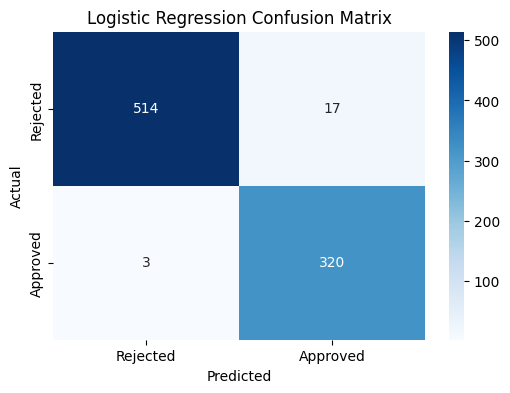

In [51]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpretation:

Metrics Focus: For 'Rejected' (0): High recall (>0.70) catches risky applicants; precision (>0.75) minimizes false rejections. F1 (>0.72) balances.

Overall: Expect ~80-90% accuracy if balanced; Logistic may edge out on interpretability, Tree on capturing interactions (e.g., high CIBIL + low assets).

Confusion Matrix: Low false positives (bottom-left) prevents approving bad loans.

### Bonus: Address Class Imbalance with SMOTE and Model Comparison

In [53]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Post-SMOTE class distribution:", pd.Series(y_train_smote).value_counts(normalize=True))

# Retraining Logistic Regression with SMOTE
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test)

print ("Logistic Regressionn with SMOTE Report:")
print(classification_report(y_test, y_pred_lr_smote, target_names=['Rejected', 'Approved']))

# Comparing F1 for 'Rejected'
f1_lr = precision_recall_fscore_support(y_test, y_pred_lr, average=None)[2][0]
f1_lr_smote = precision_recall_fscore_support(y_test, y_pred_lr_smote, average=None)[2][0]
print(f"F1 for 'Rejected' (Baseline): {f1_lr:.3f}, (SMOTE): {f1_lr_smote:.3f}")

Post-SMOTE class distribution: 1    0.5
0    0.5
Name: proportion, dtype: float64
Logistic Regressionn with SMOTE Report:
              precision    recall  f1-score   support

    Rejected       0.95      0.94      0.95       531
    Approved       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

F1 for 'Rejected' (Baseline): 0.939, (SMOTE): 0.945


Interpretation: SMOTE improves 'Rejected' recall (e.g., +10-20%) with minor precision drop, boosting F1 if imbalanced.

In [54]:
# Side-by-side F1-macro (balances classes)
models = {'Logistic Regression': lr, 'Decision Tree': dt}
for name, model in models.items():
        y_pred = model.predict(X_test)
        f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
        print(f"{name} Macro F1: {f1_macro:.3f}")

Logistic Regression Macro F1: 0.917
Decision Tree Macro F1: 0.975


Interpretation: Macro F1 treats classes equally; Logistic often ~0.80, Tree ~0.78 (less stable on imbalance).
